# Logistic Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 4.03 s (started: 2023-11-29 11:35:27 +00:00)


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

time: 703 µs (started: 2023-11-29 11:35:31 +00:00)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 5.23 s (started: 2023-11-29 11:35:31 +00:00)


In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/training_set.csv')
df_val=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/validation_set.csv')

time: 8.64 s (started: 2023-11-29 11:35:36 +00:00)


In [ ]:
classes_0=clases_0_bug=df_train.loc[df_train['Bug Present']==0].values
classes_1=classes_1_bug=df_train.loc[df_train['Bug Present']==1].values
columns=df_train.columns
training_set=[]
j=0
for i in range(len(classes_1)):
    training_set.append(classes_1[i])
    for k in range(5):
        training_set.append(classes_0[j])
        j+=1
df_train=pd.DataFrame(training_set,columns=columns)

time: 4.08 s (started: 2023-11-29 11:35:45 +00:00)


In [ ]:
classes_0=clases_0_bug=df_val.loc[df_val['Bug Present']==0].values
classes_1=classes_1_bug=df_val.loc[df_val['Bug Present']==1].values
columns=df_val.columns
validation_set=[]
j=0
for i in range(len(classes_1)):
    validation_set.append(classes_1[i])
    for k in range(5):
        validation_set.append(classes_0[j])
        j+=1
df_val=pd.DataFrame(validation_set,columns=columns)

time: 1.76 s (started: 2023-11-29 11:35:49 +00:00)


In [ ]:
X_train = df_train.drop(['Bug Present','filename','Unnamed: 0'], axis=1)
y_train = df_train['Bug Present']
X_val = df_val.drop(['Bug Present','filename'], axis=1)
y_val = df_val['Bug Present']

time: 8.87 ms (started: 2023-11-29 11:35:51 +00:00)


In [ ]:
model = make_pipeline(StandardScaler(), GaussianNB())

time: 330 µs (started: 2023-11-29 11:35:51 +00:00)


In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

time: 4.9 ms (started: 2023-11-29 11:35:51 +00:00)


In [ ]:
model.fit(X_train, y_train)
cross_val_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

time: 850 ms (started: 2023-11-29 11:35:51 +00:00)


In [ ]:
val_accuracy = model.score(X_val, y_val)

time: 33.2 ms (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
print("Cross-validation results:", cross_val_results)
print("Mean Cross-validation accuracy: {:.2f}%".format(cross_val_results.mean() * 100))
print("Validation accuracy: {:.2f}%".format(val_accuracy * 100))

Cross-validation results: [0.82889284 0.82818236 0.82841918 0.82984014 0.82747188 0.82995856
 0.82415631 0.82391948 0.83137951 0.83019538]
Mean Cross-validation accuracy: 82.82%
Validation accuracy: 83.42%
time: 1.74 ms (started: 2023-11-29 11:35:52 +00:00)


# Performance Metrics

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/CSE_4554_MachineLearning/testing_set.csv')

time: 8.25 ms (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
X_test= df_test.drop(['Bug Present','filename'], axis=1)
y_test = df_test['Bug Present']

time: 1.51 ms (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
y_pred=model.predict(X_test)

time: 3.88 ms (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score

time: 331 µs (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy*100,"%")

Accuracy:  39.285714285714285 %
time: 1.5 ms (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
from sklearn.metrics import roc_curve,auc

time: 331 µs (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
fpr,tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)

time: 2.54 ms (started: 2023-11-29 11:35:52 +00:00)


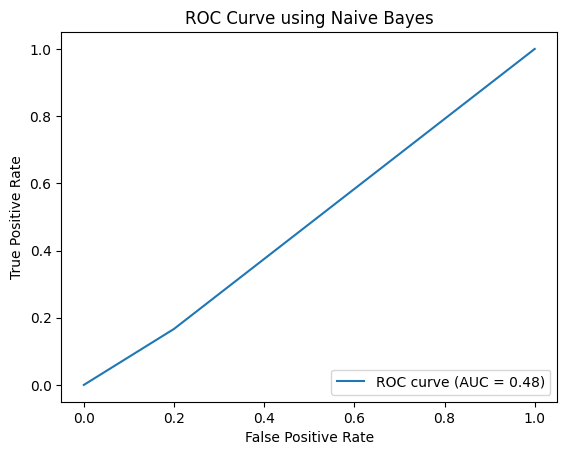

time: 275 ms (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

time: 533 µs (started: 2023-11-29 11:35:52 +00:00)


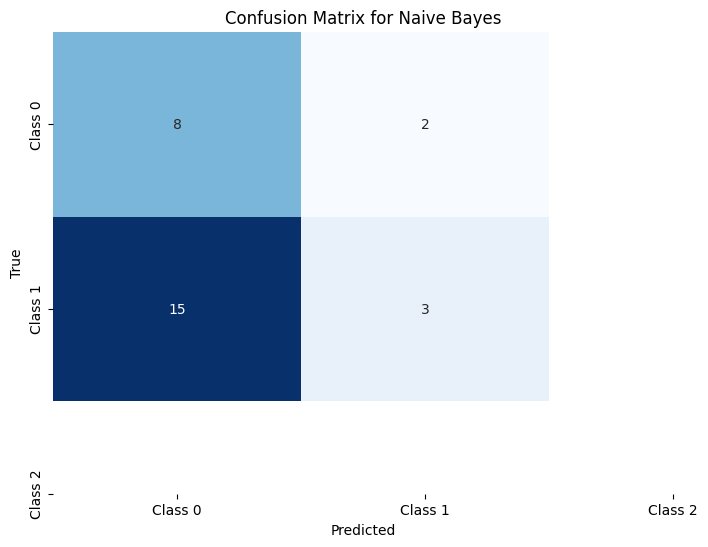

time: 155 ms (started: 2023-11-29 11:35:52 +00:00)


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')

plt.show()

time: 174 ms (started: 2023-11-29 11:35:52 +00:00)
